# sentinelRequest

sentinelRequest can be used to colocate a geodataframe (ie areas, trajectories, buoys, etc ...) with sentinel (1, but also 2 , 3 : all known by scihub)

## Install



```
conda install -c conda-forge lxml numpy geopandas shapely requests fiona matplotlib jupyter descartes
pip install --upgrade git+https://gitlab.ifremer.fr/oa04eb3/geo_shapely.git
pip install --upgrade https://gitlab.ifremer.fr/oa04eb3/geopandas_coloc.git
pip install --upgrade git+https://gitlab.ifremer.fr/sarwing/sentinelrequest.git
```



## CLI usage

In [1]:
!sentinelRequest --help

usage: sentinelRequest [-h] [--user USER] [--password PASSWORD] [--date DATE]
                       [--wkt WKT] [--filename FILENAME] [--query QUERY]
                       [--datatake DATATAKE] [--dateformat DATEFORMAT]
                       [--dtime DTIME] [--cachedir CACHEDIR]
                       [--cacherefreshrecent CACHEREFRESHRECENT] [--cols COLS]
                       [--infile INFILE] [--infile_format INFILE_FORMAT]
                       [--outfile OUTFILE] [--outfile_format OUTFILE_FORMAT]
                       [--show] [-v]

Requests SAFE list from scihub

optional arguments:
  -h, --help            show this help message and exit
  --user USER           scihub login
  --password PASSWORD   scihub password
  --date DATE           date as string (see --dateformat, or date -d). if
                        provided 2 time, first is start, last is stop
  --wkt WKT             wkt representation of the region of interest
  --filename FILENAME   filename, with joker. ex 'S1

### "One shot" from command line:

`
% sentinelRequest --user=xxxx --password=xxxxx --date='2018-09-23 00:00' --date='2018-09-23 12:00' --filename='S1?_?W_GRD*.SAFE' --cachedir=/home1/scratch/oarcher/scihub_cache/ --wkt='POLYGON ((-10 75, -10 86, 12 86, 12 84, -10 75))'
`

```
INFO:sentinelRequest:from 2018-09-23 00:00:00 to 2018-09-23 12:00:00 : 11 SAFES
INFO:sentinelRequest:Total : 11 SAFES
filename
S1B_EW_GRDM_1SDH_20180923T071854_20180923T071954_012839_017B47_17F2.SAFE
S1B_EW_GRDM_1SDH_20180923T071954_20180923T072054_012839_017B47_1E6F.SAFE
S1B_EW_GRDM_1SDH_20180923T072054_20180923T072154_012839_017B47_CD41.SAFE
S1B_EW_GRDM_1SDH_20180923T072154_20180923T072254_012839_017B47_3682.SAFE
S1A_EW_GRDM_1SDH_20180923T081003_20180923T081107_023823_02997B_049A.SAFE
S1A_EW_GRDM_1SDH_20180923T081107_20180923T081207_023823_02997B_6EA6.SAFE
S1B_EW_GRDM_1SDH_20180923T085656_20180923T085756_012840_017B4E_B07B.SAFE
S1B_EW_GRDM_1SDH_20180923T085756_20180923T085856_012840_017B4E_6CAD.SAFE
S1B_EW_GRDM_1SDH_20180923T085856_20180923T085956_012840_017B4E_1CCD.SAFE
S1B_EW_GRDM_1SDH_20180923T103504_20180923T103604_012841_017B54_DBBC.SAFE
S1B_EW_GRDM_1SDH_20180923T103604_20180923T103704_012841_017B54_B267.SAFE
```

### From csv file

`
% cat test.csv
`
```
index;startdate;stopdate;geometry
area1;2018-10-02 00:00;2018-10-02 21:00;POLYGON ((-12 35, -5 35, -5 45, -12 45, -12 35))
area2;2018-10-13 06:00;2018-10-13 21:00;POLYGON ((-10 32, -3 32, -3 42, -10 42, -10 32))
area3;2018-10-13 00:00;2018-10-13 18:00;POLYGON ((12 35, 5 35, 5 45, 12 45, 12 35))
```

`
% sentinelRequest --user=xxxx --password=xxxx --infile=test.csv --filename='S1?_?W_GRD*.SAFE' --cachedir=/home1/scratch/oarcher/scihub_cache/ --cols=index,filename
`

```
INFO:sentinelRequest:req 1/2 from 2018-10-02 00:00:00 to 2018-10-02 21:00:00 : 9/21 SAFES
INFO:sentinelRequest:req 2/2 from 2018-10-13 00:00:00 to 2018-10-13 21:00:00 : 30/35 SAFES
INFO:sentinelRequest:Total : 39 SAFES
index;filename
area1;S1A_IW_GRDH_1SDV_20181002T061827_20181002T061852_023953_029DA0_C61E.SAFE
area1;S1B_IW_GRDH_1SDV_20181002T181105_20181002T181130_012977_017F7D_FE88.SAFE
area1;S1B_IW_GRDH_1SDV_20181002T181130_20181002T181155_012977_017F7D_93FF.SAFE
area1;S1B_IW_GRDH_1SDV_20181002T181155_20181002T181222_012977_017F7D_CD9A.SAFE
area3;S1A_IW_GRDH_1SDV_20181013T053545_20181013T053610_024113_02A2DB_D121.SAFE
area3;S1A_IW_GRDH_1SDV_20181013T053815_20181013T053840_024113_02A2DB_7D53.SAFE
area2;S1B_IW_GRDH_1SDV_20181013T062502_20181013T062527_013130_018428_1E77.SAFE
area2;S1B_IW_GRDH_1SDV_20181013T062527_20181013T062552_013130_018428_82AB.SAFE
area2;S1B_IW_GRDH_1SDV_20181013T062642_20181013T062707_013130_018428_AB0E.SAFE
area2;S1B_IW_GRDH_1SDV_20181013T062707_20181013T062732_013130_018428_8210.SAFE
```

If `--date` is specified 2 times with `--infile`, it will superseeds ones founds in infile :

`
sentinelRequest --user oarcher --password nliqt6u3 --infile=test.csv --date=last-monday-7days --date=now --filename='S1?_?W_GRD*.SAFE' --cachedir=/home1/scratch/oarcher/scihub_cache/ --cols=index,filename
`



## API usage

In [2]:
%matplotlib inline
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt
import shapely.wkt as wkt

# get your own credential from  https://scihub.copernicus.eu/dhus
import pickle
user,password = pickle.load(open("credential.pkl","rb"))

import sentinelRequest as sr
# set default values, so we don't have to pass them at every requests
sr.default_user = user
sr.default_password = password
sr.default_cachedir='/home1/scratch/oarcher/scihub_cache'
sr.default_filename='S1?_?W_GRD*.SAFE'

# optional : debug messages
#import logging
#sr.logger.setLevel(logging.DEBUG)

In [3]:
help(sr.scihubQuery)

Help on function scihubQuery in module sentinelRequest:

scihubQuery(gdf=None, startdate=None, stopdate=None, date=None, dtime=None, timedelta_slice=None, filename=None, datatake=0, duplicate=False, query=None, user=None, password=None, min_sea_percent=None, fig=None, cachedir=None, cacherefreshrecent=None, progress=True, verbose=False, full_fig=False)
    input:
        gdf : 
            None or geodataframe with geometry and date. gdf usually contain almost these cols:
            index         : an index for the row (for ex area name, buoy id, etc ...)
            beginposition : datetime object (startdate)
            endposition   : datetime object (stopdate)
            geometry      : shapely object (this one is optional for whole earth)
        date: 
            column name if gdf, or datetime object
        dtime : 
            if date is not None, dtime as timedelta object will be used to compute startdate and stopdate 
        startdate : 
            None or column  name 

### Simplest api usage

Just a startdate and a stopdate are given, with no geometry

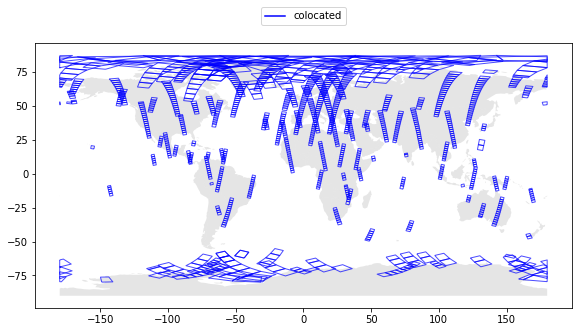

In [19]:
fig = plt.figure(figsize=(10,7))
safes = sr.scihubQuery(
    startdate=datetime.datetime(2018,10,2),
    stopdate=datetime.datetime(2018,10,3),
    fig=fig)

The result is a geodataframe with most information from scihub:

In [5]:
safes.iloc[0]

acquisitiontype                                                      NOMINAL
beginposition                                     2018-10-02 00:05:05.706000
endposition                                       2018-10-02 00:05:34.746000
filename                   S1B_IW_GRDH_1SDV_20181002T000505_20181002T0005...
footprint                  POLYGON ((-94.654839 44.261971, -91.439262 44....
format                                                                  SAFE
gmlfootprint               <gml:Polygon srsName="http://www.opengis.net/g...
identifier                 S1B_IW_GRDH_1SDV_20181002T000505_20181002T0005...
ingestiondate                                     2018-10-02 05:56:00.842000
instrumentname                             Synthetic Aperture Radar (C-band)
instrumentshortname                                                SAR-C SAR
lastorbitnumber                                                        12966
lastrelativeorbitnumber                                                  165

Most fields are converted from str to python type (geometry, datetime, int ...)

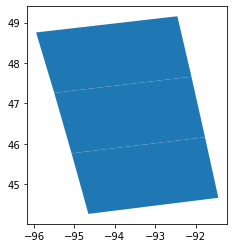

In [20]:
safes.iloc[1:4]['footprint'].plot()

In [7]:
print('safe was ingested %s after aquisition' % (safes.iloc[0]['ingestiondate']-safes.iloc[0]['endposition']))

safe was ingested 0 days 05:50:26.096000 after aquisition


### Using a geodataframe with geometries 

As an example, two areas are defined. Note that the index is named with the area name


In [8]:
gdf = gpd.GeoDataFrame({
        "beginposition" : [ datetime.datetime(2018,10,2,0) ,  datetime.datetime(2018,10,13,0) ],
        "endposition"   : [ datetime.datetime(2018,10,2,21)  ,datetime.datetime(2018,10,13,18) ],
        "geometry"      : [ wkt.loads("POINT (-7.5 53)").buffer(4),  wkt.loads("POLYGON ((-12 35, -5 35, -5 45, -12 45, -12 35))")]    
    },index=["Irland","Portugal"])
gdf

,beginposition,endposition,geometry
Irland,2018-10-02,2018-10-02 21:00:00,"POLYGON ((-3.50000 53.00000, -3.51926 52.60793..."
Portugal,2018-10-13,2018-10-13 18:00:00,"POLYGON ((-12.00000 35.00000, -5.00000 35.0000..."


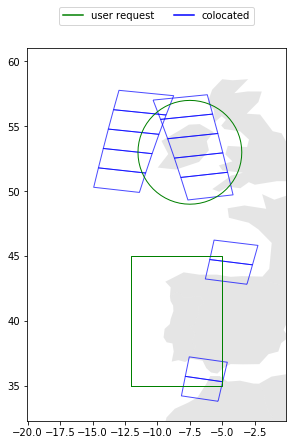

In [9]:
fig = plt.figure(figsize=(10,7))
safes = sr.scihubQuery(
        gdf=gdf,
        min_sea_percent=20, 
        fig=fig)


User requested area are in green, and found safes are in blue.


Index from original request are preserved, so it's easy to know the area that belong to a safe. (See end of example 2 for advanced index handling).

In [10]:
safes.loc['Portugal']

,acquisitiontype,beginposition,endposition,filename,footprint,format,gmlfootprint,identifier,ingestiondate,instrumentname,...,relativeorbitnumber,sensoroperationalmode,size,slicenumber,status,swathidentifier,url,url_alternative,url_icon,uuid
Portugal,NOMINAL,2018-10-13 06:24:12.316,2018-10-13 06:24:37.314,S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,"POLYGON ((-2.67424 44.32666, -5.96670 44.73592...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,2018-10-13 10:00:43.891,Synthetic Aperture Radar (C-band),...,154,IW,1.65 GB,19,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,6244c5a5-cf83-4f27-90c4-e9b2e17c39dd
Portugal,NOMINAL,2018-10-13 06:24:37.315,2018-10-13 06:25:02.315,S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,"POLYGON ((-3.10039 42.82986, -6.30884 43.23866...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,2018-10-13 10:02:56.026,Synthetic Aperture Radar (C-band),...,154,IW,1.65 GB,20,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,ea30fb07-13c8-49eb-b4c3-9f490b92fdef
Portugal,NOMINAL,2018-10-13 06:26:42.317,2018-10-13 06:27:07.315,S1B_IW_GRDH_1SDV_20181013T062642_20181013T0627...,"POLYGON ((-4.97677 35.31735, -7.85286 35.73253...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062642_20181013T0627...,2018-10-13 10:01:06.798,Synthetic Aperture Radar (C-band),...,154,IW,1.65 GB,25,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,e4d9132d-8c1c-455a-ac23-51a4a86feb98
Portugal,NOMINAL,2018-10-13 06:27:07.316,2018-10-13 06:27:32.314,S1B_IW_GRDH_1SDV_20181013T062707_20181013T0627...,"POLYGON ((-5.32803 33.81222, -8.15118 34.22947...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062707_20181013T0627...,2018-10-13 10:00:43.992,Synthetic Aperture Radar (C-band),...,154,IW,1.65 GB,26,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,f88bb340-28ab-4c7a-a806-bd797ea83145


### Working with projection

SentinelRequest works with projections, by defining crs in gdf.

The colocalisation is done using this crs.

get safes around 1000km, at 84° (North pole included) 

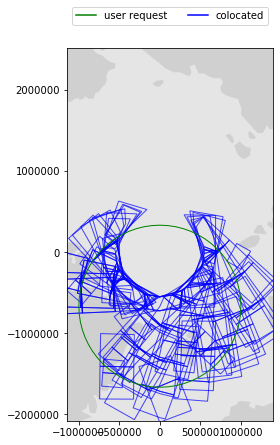

In [11]:
import pyproj
gdf = gpd.GeoDataFrame({
        "beginposition" : [ datetime.datetime(2019,12,1,0) ],
        "endposition"   : [ datetime.datetime(2019,12,4,0)],
        "geometry"      : [ wkt.loads("POINT (0 84)")]    
    },index=["Artic"], crs=pyproj.CRS('epsg:4326'))


# to polar projection (units in meters)
gdf.to_crs(pyproj.CRS('epsg:3408'), inplace=True)
gdf.loc["Artic","geometry"]=gdf.loc["Artic"].geometry.buffer(1000 * 1000)



fig = plt.figure(figsize=(10,7))
safes = sr.scihubQuery(
        gdf=gdf,
        min_sea_percent=20, 
        fig=fig)

### Cyclone track colocalization

In [12]:
import pandas as pd
#ibtracs=gpd.read_file('tmp/IBTrACS.NA.list.v04r00.points.shp')
#gdf_track=ibtracs[ibtracs['SID'] == '2019235N10324']
#gdf_track=gdf_track[['ISO_TIME','USA_WIND','geometry']]
#gdf_track['ISO_TIME']=pd.to_datetime(gdf_track['ISO_TIME'],format="%Y-%m-%d %H:%M:%S")
#gdf_track.reset_index(inplace = True,drop=True) 
#gdf_track.to_file("track.gpkg", driver="GPKG")

gdf_track = gpd.read_file('track.gpkg')
gdf_track['ISO_TIME']=pd.to_datetime(gdf_track['ISO_TIME'],format="%Y-%m-%d %H:%M:%S")
gdf_track

,ISO_TIME,USA_WIND,geometry
0,2019-08-22 12:00:00,15.0,POINT (-35.90000 9.50000)
1,2019-08-22 15:00:00,15.0,POINT (-36.56000 9.50000)
2,2019-08-22 18:00:00,15.0,POINT (-37.30000 9.50000)
3,2019-08-22 21:00:00,17.0,POINT (-38.15000 9.49000)
4,2019-08-23 00:00:00,20.0,POINT (-39.00000 9.50000)
...,...,...,...
136,2019-09-08 12:00:00,70.0,POINT (-60.40000 49.40000)
137,2019-09-08 15:00:00,65.0,POINT (-59.46000 50.10000)
138,2019-09-08 18:00:00,60.0,POINT (-58.30000 50.67000)
139,2019-09-08 21:00:00,55.0,POINT (-56.87000 51.16000)


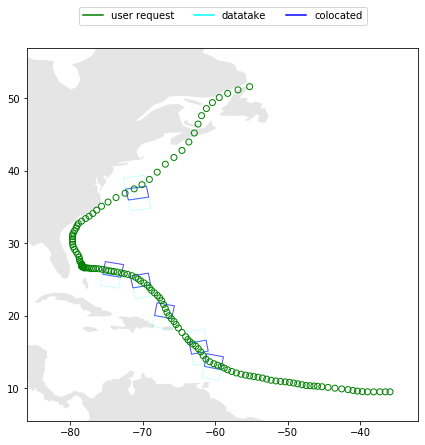

In [13]:
fig = plt.figure(figsize=(10,7))
safes = sr.scihubQuery(
        gdf=gdf_track,
        date='ISO_TIME', # no startdate/stopdate, but a date ans a dtime
        dtime=datetime.timedelta(hours=1.5),
        datatake=1,   # take adjacents safes, up to one.
        fig=fig)

#### datatake

Here, `datatake=1` is specified to retrieve adjacents safes from colocated ones (in cyan). When specified, the result contain a `datatake_index` column. 0 means the colocated one, and other values are the range of the adjacent safe (up to -n..n with `datatake=n`)

Positive `datatake_index` are for safes *after* the colocated one, and negative index are fo safes *before* the colocated one.

In [14]:
safes[['filename','datatake_index']]

,filename,datatake_index
39,S1A_IW_GRDH_1SDV_20190827T095110_20190827T0951...,0
39,S1A_IW_GRDH_1SDV_20190827T095139_20190827T0952...,1
43,S1A_IW_GRDH_1SDV_20190827T221901_20190827T2219...,-1
43,S1A_IW_GRDH_1SDV_20190827T221926_20190827T2219...,0
43,S1A_IW_GRDH_1SDV_20190827T221951_20190827T2220...,1
55,S1B_IW_GRDH_1SDV_20190829T102127_20190829T1021...,0
55,S1B_IW_GRDH_1SDV_20190829T102156_20190829T1022...,1
68,S1A_IW_GRDH_1SDV_20190830T224613_20190830T2246...,-1
68,S1A_IW_GRDH_1SDV_20190830T224638_20190830T2247...,0
72,S1A_IW_GRDH_1SDV_20190831T105329_20190831T1053...,0


#### Time slicing with timedelta_slice

One can see on previous figure that 3 requests are done. gdf rows are grouped to reduce the amount of scihub requests with the `timedelta_slice` parameter (default to `datetime.timedelta(weeks=1)` )

If we reduce `timedelta_slice`, we can see that more scihub request are done, with less uncolocated safes (ie yellow). (be warned with a big `timedelta_slice` : this can produce scihub timeouts).

(with `timedelta_slice=None`, this feature is *disabled* : a scihub request is done for *every* geometry).

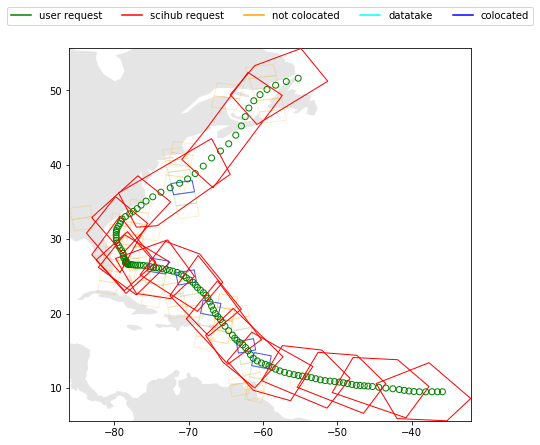

In [15]:
# same request as above, but with reduced timedelta_slice
fig = plt.figure(figsize=(10,7))
safes = sr.scihubQuery(
        gdf=gdf_track,
        date='ISO_TIME',
        dtime=datetime.timedelta(hours=1.5),
        timedelta_slice=datetime.timedelta(days=1),
        datatake=1,
        full_fig = True,  # to show internals requests and colocs
        fig=fig)

#### Merging source and result with shared index

As seen before, the result (safes) share the same index as the source. So we can merge the two geodataframe, to associate a wind speed from the cyclone track with the safe, and compute distance from the eye to the safe.

In [16]:
# here, we merge the result with the source request, to associate wind speed to each safe.
merged=safes[['filename','datatake_index','footprint']].merge(
    gdf_track[['USA_WIND','geometry']],left_index=True,right_index=True)
merged['eye_dist'] = merged.set_geometry('geometry').distance(merged.set_geometry('footprint').exterior)
# negative dist if safe contains eye
merged['eye_dist']=merged['eye_dist']*(((~merged.set_geometry('footprint').contains(merged.set_geometry('geometry'))+1)*2)-3)
merged[['filename','datatake_index','USA_WIND','eye_dist']]


,filename,datatake_index,USA_WIND,eye_dist
39,S1A_IW_GRDH_1SDV_20190827T095110_20190827T0951...,0,45.0,-0.612785
39,S1A_IW_GRDH_1SDV_20190827T095139_20190827T0952...,1,45.0,0.761460
43,S1A_IW_GRDH_1SDV_20190827T221901_20190827T2219...,-1,47.0,0.557410
43,S1A_IW_GRDH_1SDV_20190827T221926_20190827T2219...,0,47.0,-0.557319
43,S1A_IW_GRDH_1SDV_20190827T221951_20190827T2220...,1,47.0,0.982714
55,S1B_IW_GRDH_1SDV_20190829T102127_20190829T1021...,0,75.0,-0.747642
55,S1B_IW_GRDH_1SDV_20190829T102156_20190829T1022...,1,75.0,0.747733
68,S1A_IW_GRDH_1SDV_20190830T224613_20190830T2246...,-1,115.0,1.389122
68,S1A_IW_GRDH_1SDV_20190830T224638_20190830T2247...,0,115.0,-0.271777
72,S1A_IW_GRDH_1SDV_20190831T105329_20190831T1053...,0,125.0,-0.086589


## Annexes

### Antimeridian handling: small geometry vs large one


Given 2 points on the earth, there is two possible paths: one short, and one long that wrap around the earth.
Note: only longitude is wrapped, as if earth was a cylinder (epgs 4326 used for computation)  

By default, geometry are the smallest ones. To preserve a large geometry,  GeometryCollection must be used.


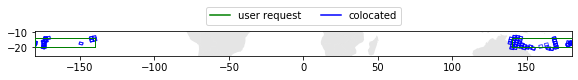

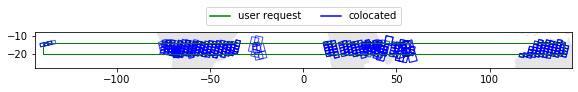

,beginposition,endposition,geometry
0,2018-10-01,2018-10-31,GEOMETRYCOLLECTION (POLYGON ((-140.00000 -14.0...


In [17]:
from shapely.geometry import GeometryCollection

# the polygon is more than 180 deg wide. It will be wrapped, and will cross antimeridian
large_poly = wkt.loads("POLYGON ((-140 -14, 140 -14, 140 -20, -140 -20, -140 -14))")

gdf = gpd.GeoDataFrame({
        "beginposition" : [ datetime.datetime(2018,10,1)],
        "endposition"   : [ datetime.datetime(2018,10,31) ],
        "geometry"      : [ large_poly ]    
    },index=[0])

fig = plt.figure(figsize=(10,7))
safes = sr.scihubQuery(
        gdf=gdf,
        fig=fig)
plt.show()

# same polygon, but encapsulated in a GeometryCollection : it will not be wrapped
gdf = gpd.GeoDataFrame({
        "beginposition" : [ datetime.datetime(2018,10,1)],
        "endposition"   : [ datetime.datetime(2018,10,31) ],
        "geometry"      : [ GeometryCollection([large_poly]) ]    
    },index=[0])

fig = plt.figure(figsize=(10,7))
safes = sr.scihubQuery(
        gdf=gdf,
        fig=fig)
plt.show()

gdf